<a href="https://colab.research.google.com/github/ArionDas/deep_learning_pytorch/blob/main/pytorch/logistic_regression_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install torch torchvision matplotlib

In [2]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [3]:
dataset = MNIST(root='data/', download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 126045060.89it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 105887844.25it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 39163107.03it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 18126097.78it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train

In [5]:
test_dataset = MNIST(root='data/', train=False)
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test

In [6]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
"""image, label = dataset[4]
plt.imshow(image, cmap='gray')
print('Label: ', label)"""

"image, label = dataset[4]\nplt.imshow(image, cmap='gray')\nprint('Label: ', label)"

Pytorch doesn't know how to work with images. So, we need convert them to tensors.

In [9]:
import torchvision.transforms as transforms

In [10]:
dataset = MNIST(root='data/',
                train=True,
                transform = transforms.ToTensor())

In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


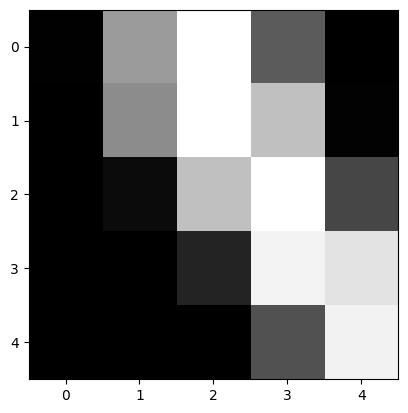

In [13]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

Training & Validation Datasets

In [14]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [15]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

Model

In [16]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size, num_classes)

In [17]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0227, -0.0210,  0.0163,  ..., -0.0295,  0.0283, -0.0331],
        [ 0.0354,  0.0283, -0.0302,  ...,  0.0195, -0.0111, -0.0032],
        [-0.0025,  0.0344,  0.0172,  ..., -0.0027, -0.0205, -0.0160],
        ...,
        [-0.0217,  0.0240,  0.0050,  ..., -0.0062, -0.0291,  0.0148],
        [-0.0178,  0.0296, -0.0261,  ...,  0.0297, -0.0025, -0.0310],
        [-0.0266,  0.0237, -0.0113,  ...,  0.0140, -0.0156,  0.0149]],
       requires_grad=True)

In [18]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0124, -0.0319,  0.0328, -0.0117, -0.0304,  0.0177, -0.0097,  0.0222,
        -0.0321,  0.0333], requires_grad=True)

In [19]:
"""for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)
  break"""

tensor([5, 1, 0, 1, 5, 9, 3, 7, 8, 6, 7, 6, 8, 0, 9, 5, 7, 8, 6, 9, 5, 5, 4, 8,
        7, 1, 2, 2, 1, 7, 4, 1, 7, 6, 0, 6, 3, 0, 0, 3, 3, 0, 6, 0, 2, 9, 6, 9,
        3, 0, 7, 3, 4, 1, 7, 8, 4, 2, 7, 8, 7, 1, 6, 1, 5, 8, 0, 1, 2, 7, 9, 3,
        1, 5, 1, 4, 4, 6, 1, 2, 0, 9, 9, 8, 1, 2, 1, 6, 3, 3, 8, 3, 7, 8, 3, 8,
        5, 5, 8, 4, 3, 9, 1, 5, 7, 2, 0, 4, 9, 1, 9, 2, 7, 1, 9, 7, 1, 2, 2, 3,
        3, 9, 6, 0, 1, 0, 9, 9])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

In [20]:
"""class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(128, 784)
    out = self.linear(xb)
    return out

  def

model = MnistModel()"""

In [21]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0305,  0.0091, -0.0110,  ...,  0.0062, -0.0030, -0.0223],
         [-0.0001, -0.0003,  0.0297,  ...,  0.0046,  0.0212,  0.0060],
         [ 0.0099,  0.0197,  0.0321,  ..., -0.0257, -0.0127, -0.0045],
         ...,
         [-0.0122, -0.0238, -0.0092,  ..., -0.0187, -0.0070, -0.0186],
         [-0.0208, -0.0123, -0.0303,  ..., -0.0077,  0.0191,  0.0097],
         [ 0.0191, -0.0296, -0.0111,  ..., -0.0101, -0.0330,  0.0227]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0189, -0.0068,  0.0051, -0.0073, -0.0231,  0.0149,  0.0130, -0.0092,
          0.0294,  0.0216], requires_grad=True)]

In [22]:
for images, labels in train_loader:
  print('images.shape: ', images.shape)
  outputs = model(images)
  break

print('outputs.shape: ', outputs.shape)
print('sample outputs: \n', outputs[:2].data)

images.shape:  torch.Size([128, 1, 28, 28])
outputs.shape:  torch.Size([128, 10])
sample outputs: 
 tensor([[ 0.2866,  0.3211,  0.0094,  0.0241, -0.0787,  0.1828,  0.1979, -0.0276,
         -0.0150,  0.3799],
        [-0.1661,  0.0172, -0.1153, -0.2001,  0.3662, -0.0770,  0.2159, -0.0236,
          0.2538,  0.0601]])


In [24]:
# we have to change the negative numbers, and also b/w. 0 & 1
torch.exp(outputs[0])

tensor([1.3318, 1.3786, 1.0095, 1.0244, 0.9243, 1.2006, 1.2188, 0.9728, 0.9851,
        1.4621], grad_fn=<ExpBackward0>)

In [25]:
exps = torch.exp(outputs[0])
exps

tensor([1.3318, 1.3786, 1.0095, 1.0244, 0.9243, 1.2006, 1.2188, 0.9728, 0.9851,
        1.4621], grad_fn=<ExpBackward0>)

In [26]:
exps / torch.sum(exps)

tensor([0.1157, 0.1198, 0.0877, 0.0890, 0.0803, 0.1043, 0.1059, 0.0845, 0.0856,
        0.1270], grad_fn=<DivBackward0>)

In [27]:
probs = exps / torch.sum(exps)
probs

tensor([0.1157, 0.1198, 0.0877, 0.0890, 0.0803, 0.1043, 0.1059, 0.0845, 0.0856,
        0.1270], grad_fn=<DivBackward0>)

In [28]:
torch.sum(probs)

tensor(1.0000, grad_fn=<SumBackward0>)

That was the softmax function...

In [29]:
import torch.nn.functional as F

In [30]:
probs = F.softmax(outputs, dim=1)
probs

tensor([[0.1157, 0.1198, 0.0877,  ..., 0.0845, 0.0856, 0.1270],
        [0.0806, 0.0968, 0.0848,  ..., 0.0929, 0.1226, 0.1010],
        [0.1439, 0.0980, 0.0941,  ..., 0.0970, 0.0799, 0.0969],
        ...,
        [0.0895, 0.1065, 0.1242,  ..., 0.0888, 0.1087, 0.1014],
        [0.0867, 0.1155, 0.0972,  ..., 0.0902, 0.0972, 0.1140],
        [0.0660, 0.1037, 0.0968,  ..., 0.0968, 0.1453, 0.0974]],
       grad_fn=<SoftmaxBackward0>)

In [31]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([9, 4, 0, 1, 1, 1, 1, 9, 1, 4, 1, 6, 9, 2, 9, 4, 0, 1, 9, 0, 6, 0, 1, 4,
        9, 6, 5, 1, 2, 6, 9, 1, 9, 9, 6, 1, 5, 1, 6, 0, 6, 7, 1, 1, 1, 4, 0, 1,
        6, 2, 1, 0, 6, 0, 7, 4, 6, 1, 4, 5, 1, 6, 6, 1, 0, 5, 9, 2, 1, 6, 0, 5,
        8, 1, 9, 1, 6, 1, 6, 8, 9, 5, 2, 5, 1, 1, 1, 1, 7, 2, 2, 0, 1, 5, 4, 1,
        9, 1, 1, 1, 1, 9, 4, 9, 1, 4, 6, 8, 7, 4, 8, 0, 9, 1, 9, 1, 6, 9, 4, 0,
        1, 1, 0, 0, 4, 2, 1, 8])
tensor([0.1270, 0.1372, 0.1439, 0.1345, 0.1363, 0.1125, 0.1208, 0.1356, 0.1215,
        0.1306, 0.1207, 0.1361, 0.1320, 0.1219, 0.1273, 0.1272, 0.1184, 0.1327,
        0.1181, 0.1237, 0.1215, 0.1464, 0.1219, 0.1251, 0.1119, 0.1242, 0.1166,
        0.1301, 0.1165, 0.1400, 0.1316, 0.1148, 0.1178, 0.1134, 0.1339, 0.1280,
        0.1192, 0.1324, 0.1173, 0.1414, 0.1126, 0.1146, 0.1184, 0.1206, 0.1284,
        0.1257, 0.1266, 0.1202, 0.1159, 0.1253, 0.1258, 0.1241, 0.1233, 0.1473,
        0.1130, 0.1159, 0.1246, 0.1219, 0.1381, 0.1297, 0.1174, 0.1178, 0.1176,
       

In [32]:
labels

tensor([9, 0, 1, 9, 3, 7, 4, 8, 0, 2, 9, 0, 7, 5, 6, 0, 9, 7, 9, 8, 4, 1, 1, 9,
        4, 2, 4, 2, 1, 0, 4, 6, 5, 2, 4, 3, 5, 9, 4, 8, 7, 3, 7, 9, 5, 4, 2, 6,
        3, 4, 5, 1, 5, 1, 5, 8, 9, 7, 0, 6, 5, 4, 4, 2, 8, 5, 4, 8, 5, 4, 1, 9,
        5, 8, 2, 2, 9, 6, 0, 2, 3, 7, 6, 3, 4, 7, 0, 3, 2, 5, 3, 1, 3, 7, 3, 1,
        3, 4, 1, 1, 1, 5, 0, 5, 9, 5, 0, 6, 6, 2, 0, 3, 2, 8, 6, 9, 0, 3, 0, 1,
        6, 2, 1, 3, 0, 1, 7, 6])

Evaluation Metric & Loss Function

In [33]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [34]:
accuracy(outputs, labels)

tensor(0.0781)

Cross Entropy

In [35]:
loss_fn = F.cross_entropy

In [37]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3201, grad_fn=<NllLossBackward0>)


Training phase
1. generate predictions
2. calculate loss
3. compute gradients
4. update weights
5. reset gradients

Validation phase
1. generate predictions
2. calculate loss
3. calculate metrics (accuracy, etc.)

calculate average validation loss & metrics

In [41]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out

  def training_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return {'val_loss': loss, 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [42]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    # training phase
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # validation phase
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)

  return history

In [43]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.296461343765259, 'val_acc': 0.1386471539735794}

In [44]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9327, val_acc: 0.6162
Epoch [1], val_loss: 1.6677, val_acc: 0.7316
Epoch [2], val_loss: 1.4691, val_acc: 0.7609
Epoch [3], val_loss: 1.3190, val_acc: 0.7787
Epoch [4], val_loss: 1.2033, val_acc: 0.7948


In [45]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1123, val_acc: 0.8039
Epoch [1], val_loss: 1.0391, val_acc: 0.8126
Epoch [2], val_loss: 0.9793, val_acc: 0.8188
Epoch [3], val_loss: 0.9294, val_acc: 0.8235
Epoch [4], val_loss: 0.8873, val_acc: 0.8271


Text(0.5, 1.0, 'Accuracy vs no. of epochs')

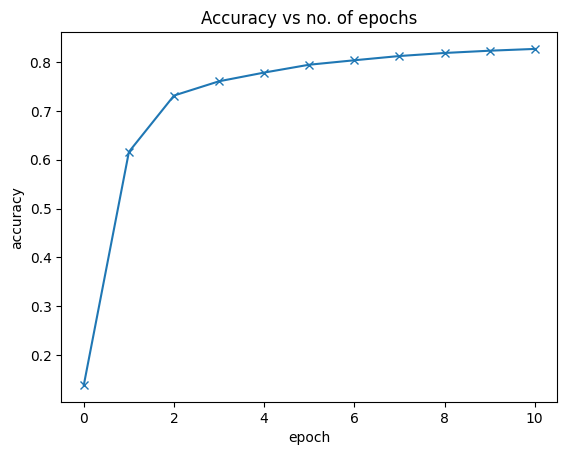

In [46]:
history = [result0] + history1 + history2
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs no. of epochs')